## Part A: Analysis on  a single Driver
We study the following aspects
* Status Distribution in time domain
* Movement on the map

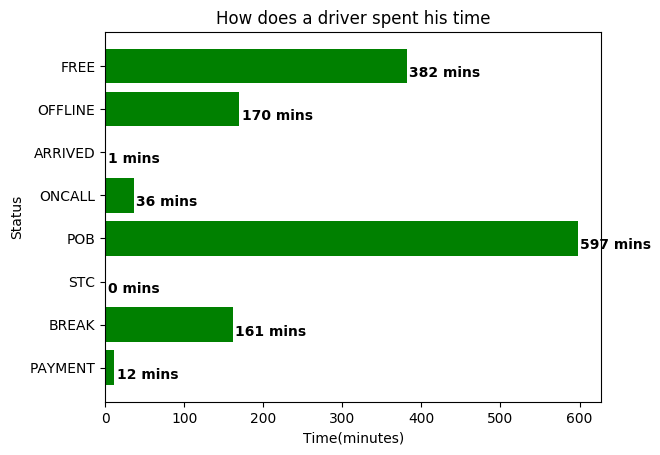

In [30]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def parse_line(line):
    driver, car, ts, lat, lon, status = line.split(",")
    ts = datetime.strptime(ts, "%d/%m/%Y %H:%M:%S")
    return ts, lat, lon, str(status).strip()

def visualise_temporal_behaviour():
    input_f = "./data/driver_pattern_visualisation/sample_filtered.csv"
    status = ['STC', 'FREE', 'BREAK', 'ARRIVED', 'ONCALL', 'OFFLINE', 'POB', 'PAYMENT']
    status_dict = {}
    for s in status:
        status_dict[s] = 0

    with open(input_f) as input:
        lines = input.readlines()
        for i in range(0, len(lines), 2):
            line1, line2 = lines[i], lines[i+1]
            ts1, _, _, status1 = parse_line(line1)
            ts2, _, _, status2 = parse_line(line2)
            span = ts2-ts1
            status_dict[status1] = status_dict[status1]+span.total_seconds()
    min_list, status_list = [], []
    for k in status_dict:
        status_list.append(k)
        min_list.append(status_dict[k] / 60.0)

    plot(min_list, status_list)
    
def plot(x, labels):
    plt.rcdefaults()
    fig, ax = plt.subplots()
    people = labels
    y_pos = np.arange(len(people))
    performance = x

    ax.barh(y_pos, performance, align='center',
            color='green', ecolor='black')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(people)
    ax.invert_yaxis()
    for i, v in enumerate(x):
        ax.text(v+3, i+.25, str(round(v))+" mins", color="black", fontweight='bold')
    ax.set_xlabel('Time(minutes)')
    ax.set_ylabel('Status')
    ax.set_title('How does a driver spent his time')

    plt.show()
    
def show_transanction():
    input_f = "./data/driver_pattern_visualisation/sample_transanction.csv"
    with open(input_f) as input:
        lines = input.readlines()
        for i in range(0, len(lines), 2):
            dt1, _, _, _ = parse_line(lines[i])
            dt2, _, _, _ = parse_line(lines[i+1])

            span = dt2-dt1
            print("|", dt1.strftime("%H:%M"), "-",dt2.strftime("%H:%M"),"|",round(span.total_seconds()/60.0),"mins","|")

def show_offline_break():
    input_f = "./data/driver_pattern_visualisation/sample_sorted.csv"
    with open(input_f) as input:
        lines = input.readlines()
        offline_dt, break_dt = [], []
        for line in lines:
            dt,_,_,status = parse_line(line)
            if status == "OFFLINE":
                offline_dt.append(dt)
            if status == "BREAK":
                break_dt.append(dt)
        for i in offline_dt:
            print(i.strftime("%H:%M"))
        print("break")
        for j in break_dt:
            print(j.strftime("%H:%M"))

visualise_temporal_behaviour()
# show_offline_break()



## Break and Offline time
| Time | Total | Status | 
| ------------- |:-------------:| :----:|
| 03:49 - 06:39 | 161 mins| offline |
| 06:47 - 07:01 |14 mins| break | 
| 10:00 - 10:47 | 47 mins | break |
| 12:21 - 12:29 | 8 mins |  break |
| 12:45 - 12:49 | 4 mins| break |
| 13:09 - 13:13 | 4 mins| break |
| 13:55 - 14:11 | 16 mins |  break |
| 14:42 - 14:52 | 10 mins | break |
| 15:56 - 16:05 | 9 mins |  break |
| 16:34 - 16:41 | 7 mins |  break |
| 17:05 - 17:54 | 49 mins |  break |
| 18:04 - 18:25 | 21 mins| break |

## Transanction Records in a day
| Time         | Driving time |
| ------------- |:-------------:| 
| Early Morning | |
| 00:00 - 00:15 | 15 mins |
| 00:44 - 00:53 | 9 mins |
| 00:53 - 01:05 | 11 mins |
| 01:05 - 01:25 | 20 mins |
| Peak | |
| 06:56 - 07:01 | 5 mins |
| 07:14 - 07:59 | 46 mins |
| 08:13 - 09:00 | 47 mins |
| 09:19 - 09:58 | 39 mins |
| 10:47 - 11:22 | 34 mins |
| 11:27 - 11:46 | 19 mins |
| Noon | |
| 12:02 - 12:21 | 19 mins |
| 12:30 - 12:43 | 12 mins |
| 12:50 - 13:08 | 18 mins |
| 13:20 - 13:37 | 17 mins |
| 13:39 - 13:50 | 11 mins |
| Afternoon | |
| 14:19 - 14:41 | 22 mins |
| 15:14 - 15:30 | 16 mins |
| 15:30 - 15:53 | 23 mins |
| 16:06 - 16:30 | 24 mins |
| 16:41 - 17:02 | 21 mins |
| Dinner | |
| 18:29 - 18:41 | 11 mins |
| 18:48 - 19:09 | 21 mins |
| 19:29 - 19:35 | 6 mins |
| 19:45 - 20:00 | 15 mins |
| Evenning | |
| 20:38 - 21:00 | 21 mins |
| 21:08 - 21:41 | 33 mins |
| 21:49 - 22:03 | 14 mins |
| 22:18 - 22:42 | 24 mins |
| 23:13 - 23:43 | 30 mins |
| 23:45 - 23:57 | 11 mins |

# Movement On the Map


### 1. Dotted Trace of every point
![Movement Trace](img/all_dots.png)

### 2. Transanction Visualisation
![Transanction w/ arrow](img/transation_arrow.png)


### 3. Transanction Visualisation with dots
* POB: starting point of a transanction
* PAYMENT: ending point of a transanction
![Transanction w/ dots](img/transaction_dots.png)

### 4. Demand Distribution
![Demand](img/demand.jpg)

### 5. Matching Process Trace
* FREE: trace of a driving when looking for passenger
* POB: starting point of a transanction
* ONCALL: trace of going to fetch a passenger when called

![Demand](img/free_oncall_pob.png)



## Part 2: Macro Analysis on  20 drivers
We study the following: 
* Free Time distribution
* Service/POB time disribution

In [19]:
def load_macro_stats():
    header = ['STC','FREE','BREAK','ARRIVED','ONCALL','OFFLINE','POB','PAYMENT','NOSHOW','BUSY']
    stats = np.load("macro_stats.npy")
    for i, name in enumerate(header):
        print("|%s|%.2f|%.2f|"%(name, np.mean(stats[:,i]), np.std(stats[:,i])))
    
# load_macro_stats()    

### Some statistics of each status for 20 drivers in a day
Unit in mintes

|Status | Mean(mins) | STD | 
|------------- |:-------------:| :----:|
|STC|5.53|9.13|
|FREE|158.26|75.88|
|BREAK|110.46|58.35|
|ARRIVED|3.73|4.86|
|ONCALL|12.55|10.22|
|OFFLINE|206.56|115.62|
|POB|203.06|68.36|
|PAYMENT|7.43|3.21|
|NOSHOW|0.03|0.11|
|BUSY|13.64|43.91|                


We sample two cars.
One with the max free time.
One with the max POB time.

51A3F70B9BE7EED66E1307EA8955E0
78291F86775D6F1893069777549B1C


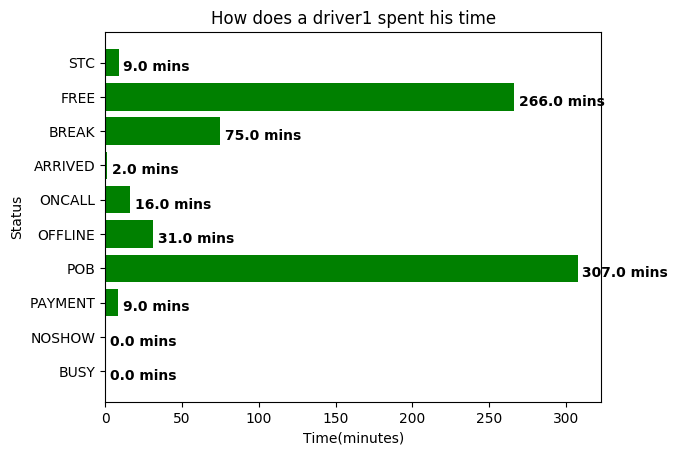

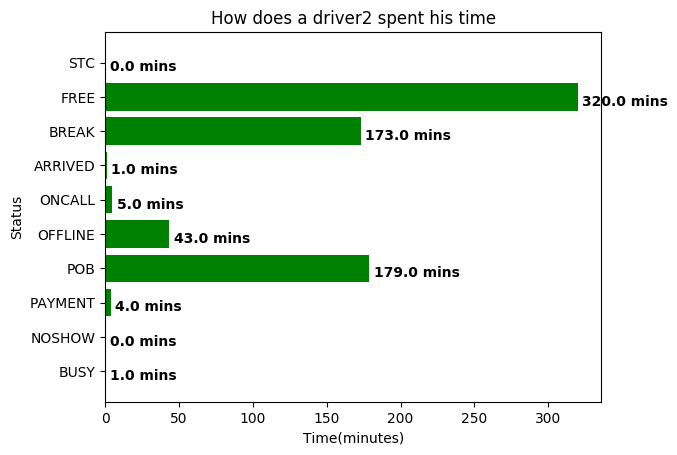

In [31]:
import matplotlib.pyplot as plt

def select_typical_driver():
    free_idx = 1
    pob_idx = 6
    stats = np.load("macro_stats.npy")
    print("51A3F70B9BE7EED66E1307EA8955E0")
    print("78291F86775D6F1893069777549B1C")
    header = ['STC','FREE','BREAK','ARRIVED','ONCALL','OFFLINE','POB','PAYMENT','NOSHOW','BUSY']


    plot(stats[6], header, "driver1")
    plot(stats[14], header,"driver2")
    
def plot(x, labels, name):
    plt.rcdefaults()
    fig, ax = plt.subplots()
    people = labels
    y_pos = np.arange(len(people))
    performance = x

    ax.barh(y_pos, performance, align='center',
            color='green', ecolor='black')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(people)
    ax.invert_yaxis()
    for i, v in enumerate(x):
        ax.text(v+3, i+.25, str(round(v))+" mins", color="black", fontweight='bold')
    ax.set_xlabel('Time(minutes)')
    ax.set_ylabel('Status')
    ax.set_title('How does a %s spent his time'%name)

    plt.show()
    
comments = """
We sample two cars.
One with the max free time.
One with the max POB time.
"""
print(comments)
select_typical_driver()  

### 1. Driver 1(with max POB time)
* FREE: trace of a driving when looking for passenger
* POB: starting point of a transanction
* ONCALL: trace of going to fetch a passenger when called
![Movement Trace](img/driver1.png)

### 2. Driver 2(with max FREE time)
* FREE: trace of a driving when looking for passenger
* POB: starting point of a transanction
* ONCALL: trace of going to fetch a passenger when called
![Transanction w/ arrow](img/driver2.png)

